# 16장 실전 데이터 분석 프로젝트

## 16.1 데이터 분석 프로세스

## 16.2 데이터 획득, 처리, 시각화 심화

### 깃허브에서 파일 다운로드

**[16장: 533 ~ 534페이지]**

In [2]:
import requests

# 깃허브의 파일 URL
url = 'https://github.com/wikibook/python-for-data-analysis-rev/raw/master/readme.txt'

# URL에 해당하는 파일을 내려받음
r = requests.get(url)

# 파일을 저장할 폴더와 파일명을 지정
file_name = 'C:/myPyCode/data/readme.txt'

# 내려받은 파일을 지정한 폴더에 저장 (wb - 바이너리 형태로 쓰기)
with open(file_name, 'wb') as f:
    f.write(r.content)

r.content

b"# \xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0 \xeb\xb6\x84\xec\x84\x9d\xec\x9d\x84 \xec\x9c\x84\xed\x95\x9c \xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac \xec\xb2\xa0\xec\xa0\x80 \xec\x9e\x85\xeb\xac\xb8\n\n- \xec\x95\x95\xec\xb6\x95 \xed\x8c\x8c\xec\x9d\xbc(zip \xed\x8c\x8c\xec\x9d\xbc) \xeb\x8b\xa4\xec\x9a\xb4\xeb\xa1\x9c\xeb\x93\x9c: https://github.com/wikibook/python-for-data-analysis-rev/archive/master.zip\n  - \xec\x95\x95\xec\xb6\x95 \xed\x8c\x8c\xec\x9d\xbc\xec\x9d\x84 \xeb\x8b\xa4\xec\x9a\xb4\xeb\xa1\x9c\xeb\x93\x9c \xeb\xb0\x9b\xea\xb3\xa0 \xec\x95\x95\xec\xb6\x95\xec\x9d\x84 \xed\x92\x89\xeb\x8b\x88\xeb\x8b\xa4.\n  \n- \xec\x86\x8c\xec\x8a\xa4 \xec\xbd\x94\xeb\x93\x9c \xec\x9c\x84\xec\xb9\x98: /notebook \xed\x8f\xb4\xeb\x8d\x94\n  - notebook \xed\x8f\xb4\xeb\x8d\x94\xec\x97\x90\xeb\x8a\x94 \xec\x9d\xb4 \xec\xb1\x85\xec\x97\x90\xec\x84\x9c \xec\x82\xac\xec\x9a\xa9\xed\x95\x9c \xec\xbd\x94\xeb\x93\x9c\xea\xb0\x80 \xeb\x85\xb8\xed\x8a\xb8\xeb\xb6\x81 \xed\x8c\x8c\xec\x9d\xbc(*.ipynb)\xeb\xa1

**[16장: 534페이지]**

In [4]:
import os    # 모듈 호출

os.path.isfile(file_name)    # 해당파일이 제대로 생성되었는지 확인

True

### 데이터에서 결측치 확인 및 처리

#### 결측치 확인

**[16장: 535페이지]**

In [5]:
!type C:\myPyCode\data\missing_data_test.csv

연도,제품1,제품2,제품3,제품4
2015,250,150,,
2016,200,160,170,
2017,150,200,100,150
2018,120,230,130,170
2019,,250,140,


**[16장: 535페이지]**

In [6]:
import pandas as pd

data_file = "C:/myPyCode/data/missing_data_test.csv"

df = pd.read_csv(data_file, encoding = "cp949", index_col = "연도")

df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


**[16장: 535페이지]**

In [8]:
df.isnull()   # 결측값 확인하기

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


**[16장: 536페이지]**

In [11]:
df.isnull().sum()   # 각 컬럼별로 결측값 개수 합산

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

#### 결측치 처리

**[16장: 537페이지]**

In [15]:
df.drop(index=[2019])   # 해당 인덱스 행을 삭제

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 537페이지]**

In [16]:
df.drop(columns=['제품3', '제품4'])  # 해당 컬럼 열을 삭제

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


**[16장: 538페이지]** 

In [17]:
df.drop(index=[2018, 2019], columns=['제품3', '제품4'])  # 컬럼, 인덱스를 선택하여 삭제

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


**[16장: 538페이지]** 

In [20]:
df.dropna() # 결측값이 포함된 행을 삭제함
             #df.dropna(axis=0)도 결과는 같음

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 539페이지]** 

In [21]:
df.dropna(axis=0, subset=['제품1'])  #선택한 컬럼에서 결측값이 포함된 행을 삭제

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 539페이지]** 

In [24]:
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [23]:
df.dropna(axis=1)    # 결측값이 포함된 열을 삭제

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


**[16장: 539페이지]** 

In [25]:
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [26]:
df.dropna(axis=1, subset=[2015])  # 2015 인덱스 행에서 결측치가 있는 열을 모두 삭제

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


**[16장: 540페이지]** 

In [27]:
df.dropna(axis=1, subset=[2016, 2019])

,제품2,제품3
연도,,
2015,150,NaN
2016,160,170.0
2017,200,100.0
2018,230,130.0
2019,250,140.0


**[16장: 541페이지]**

In [28]:
df.fillna(0)   # 결측치를 0으로 바꿈

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


**[16장: 541페이지]**

In [30]:
df.fillna(method='bfill')  # 결측치를 다음열의 값으로 변경

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


**[16장: 541페이지]**

In [31]:
df.fillna(method='ffill')   # 이전 열의 값으로 결측치를 채움

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


**[16장: 542페이지]**

In [32]:
values = {'제품1': 100,  '제품4': 400}
df.fillna(value=values)   # 딕셔너리를 생성하여 열을 지정해서 결측치를 채움

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


### 데이터의 요약 및 재구성

#### 데이터의 구조 살펴보기

**[16장: 543페이지]**

In [33]:
import pandas as pd

data_file = "C:/myPyCode/data/total_sales_data.csv"

df_sales = pd.read_csv(data_file)
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


**[16장: 543페이지]**

In [34]:
df_sales.info()    # 데이터프레임 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
매장명     9 non-null object
제품종류    9 non-null object
모델명     9 non-null object
판매      9 non-null int64
재고      9 non-null int64
dtypes: int64(2), object(3)
memory usage: 440.0+ bytes


**[16장: 544페이지]**

In [36]:
df_sales['매장명'].value_counts()   # 해당 열 데이터값의 개수

C    3
A    3
B    3
Name: 매장명, dtype: int64

**[16장: 545페이지]**

In [38]:
df_sales['제품종류'].value_counts()

스마트폰    5
TV      4
Name: 제품종류, dtype: int64

In [39]:
df_sales['모델명'].value_counts()

S2    3
V1    3
S1    2
V2    1
Name: 모델명, dtype: int64

#### 피벗 테이블로 데이터 재구성하기

**[16장: 546페이지]**

In [40]:
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


**[16장: 546페이지]**

In [42]:
df_sales.pivot_table(index=["매장명", "제품종류", "모델명"],
                     values =["판매","재고"], aggfunc='sum')   # pivot_table 하고 aggfunc = 'sum'

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [45]:
df_sales.pivot_table(index=["매장명", "제품종류", "모델명"],
                     values =["판매","재고"], aggfunc='mean')   # pivot_table 하고 aggfunc = 'mean'

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

**[16장: 547페이지]**

In [47]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='sum')

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

**[16장: 547페이지]**

In [49]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='count')

재고      판매     
제품종류 TV 스마트폰 TV 스마트폰
매장명                 
A     1    2  1    2
B     1    2  1    2
C     2    1  2    1

### 워드 클라우드를 이용한 데이터 시각화

**[16장: 549~550페이지]**

In [6]:
pip install wordcloud    # 워드클라우드 모듈 설치

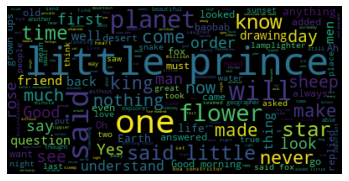

In [56]:
from wordcloud import WordCloud    # 클래스 호출
import matplotlib.pyplot as plt    # pyplot 모듈 호출

file_name = 'C:/myPyCode/data/littleprince_djvu.txt'    # 텍스트파일위치 변수에 저장

with open(file_name) as f:         # 파일을 읽기 모드로 열기
    text = f.read()                # 파일의 내용 읽어오기

wordcloud_image = WordCloud().generate(text)           # 워드 클라우드의 이미지 생성

plt.imshow(wordcloud_image, interpolation='bilinear')  # pyplot의 imshow()메소드를 써서 이미지를 화면에 출력할 세팅
plt.axis("off")                                        # 축 정보 지우기
plt.show()

**[16장: 550페이지]**

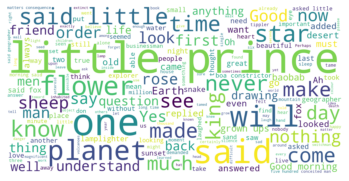

In [57]:
wordcloud_image = WordCloud(background_color='white', max_font_size=600, width=1600, height=800).generate(text)
                            # 괄호 안에 속성 정보 기입

plt.imshow(wordcloud_image, interpolation="bilinear") # 출력 세팅
plt.axis("off")
plt.show()                                            # 출력

**[16장: 551페이지]**

In [58]:
image_file_name = 'C:/myPyCode/figures/little_prince.png'  # 이미지파일명 지정

wordcloud_image.to_file(image_file_name)      # 이미지파일로 저장
plt.show()

**[16장: 551페이지]**
- wordcount 데이터프레임 파일로 워드클라우드 생성하기

In [59]:
import pandas as pd   # 모듈 호출

word_count_file = "C:/myPyCode/data/word_count.csv"  # 파일 위치를 변수에 저장   
word_count = pd.read_csv(word_count_file, index_col = '단어')  # 불러오기

word_count.head(5)  # 상위 5줄 호출

,빈도
단어,
산업혁명,1662
기술,1223
사업,1126
혁신,1084
경제,1000


**[16장: 552페이지]**

In [60]:
word_count['빈도'][0:5]  # 빈도 컬럼에서 0에서 5전까지 출력

단어
산업혁명    1662
기술      1223
사업      1126
혁신      1084
경제      1000
Name: 빈도, dtype: int64

**[16장: 552페이지]**

In [61]:
type(word_count['빈도'])

pandas.core.series.Series

**[16장: 553페이지]**
- WordCloud() 클래스에 입력변수를 지정해서 객체를 생성
- 객체명.generate(text): 텍스트로부터 이미지 생성
- 객체명.generate_from_frequencies(frequencies): wordcount 데이터프레임으로부터 이미지 생성
- plt.imshow(이미지파일, interpolation="bilinear"): 이미지파일 출력 

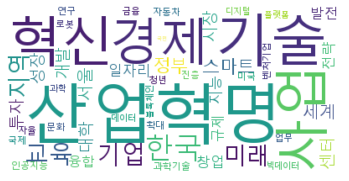

In [63]:
from wordcloud import WordCloud     # 워드클라우드 클래스 호출
import matplotlib.pyplot as plt     # 파이플롯 모듈 호출

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 위치 지정하기

wc = WordCloud(font_path=korean_font_path, background_color='white')  # 워드 클라우드 이미지 생성(폰트, 배경색 지정)

frequencies = word_count['빈도'][:]      # 데이터프레임의 한 컬럼의 줄 (Series) 선택
wordcloud_image = wc.generate_from_frequencies(frequencies)  # 이미지 생성


plt.imshow(wordcloud_image, interpolation="bilinear")   # 이미지 출력 세팅
plt.axis("off")                                         # 축 정보 삭제
plt.show()                                              # 출력

## 16.3 실전 데이터(서울시 업무추진비) 분석

### 데이터 분석의 주제 선정

### 데이터 수집

**[16장: 557~558페이지]**

In [65]:
import requests
import os
import pathlib

#인자: 확장자, 연도, 내려받을 폴더
def get_seoul_expense_list(extension, year, data_folder): 

    # 깃허브의 데이터 위치 지정
    # ex) 'https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/'
    expense_list_year_url = 'https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/'

    # 데이터를 내려받을 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 내려받을 폴더가 없다면 폴더 생성
    if(os.path.isdir(expense_list_year_dir)):
        print("데이터 폴더({0})가 이미 있습니다. {0}년 데이터의 다운로드를 시작합니다.".format(year))
    else:
        print("데이터 폴더({0})가 없어서 생성했습니다. {0}년 데이터의 다운로드를 시작합니다.".format(year))
        # 폴더 생성
        pathlib.Path(expense_list_year_dir).mkdir(parents=True, exist_ok=True) 
        
    # 지정한 폴더로 1월 ~ 12월 업무추진비 파일을 다운로드
    for k in range(12):
        file_name = '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension)    
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        with open(expense_list_year_dir + file_name, 'wb') as f:
            f.write(r.content)

**[16장: 558~559페이지]**

In [66]:
# 내려받을 업무추진비 데이터의 파일 형식을 지정
extension = "csv" 

# 내려받을 업무추진비 데이터의 연도를 지정
year = 2016 

# 내려받을 업무추진비 데이터의 폴더를 지정
data_folder = 'C:/myPyCode/data/seoul_expense/' 

# 함수를 실행
get_seoul_expense_list(extension, year, data_folder)

데이터 폴더(2016)가 이미 있습니다. 2016년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201601_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201602_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201603_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201604_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201605_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201606_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201607_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201608_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201609_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201610_expense_list.csv
https://github.com/seou

**[16장: 559~560페이지]**

In [67]:
import glob

path_name = 'C:/myPyCode/data/seoul_expense/2016/' # 폴더 이름

# 지정 폴더에서 파일명에 list.csv가 포함된 파일만 지정
file_name_for_glob = path_name + "*list.csv" 

csv_files = []
for csv_file in glob.glob(file_name_for_glob): 
    # 반환값에서 폴더는 제거하고 파일 이름만 추출
    csv_files.append(csv_file.split("\\")[-1]) 

print("[폴더 이름]", path_name) # 폴더명 출력
print("* CSV 파일:", csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016/
* CSV 파일: ['201601_expense_list.csv', '201602_expense_list.csv', '201603_expense_list.csv', '201604_expense_list.csv', '201605_expense_list.csv', '201606_expense_list.csv', '201607_expense_list.csv', '201608_expense_list.csv', '201609_expense_list.csv', '201610_expense_list.csv', '201611_expense_list.csv', '201612_expense_list.csv']


**[16장: 560페이지]**

In [68]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 다운로드받을 연도를 지정

extension = "csv"
# extension = "xlsx"
# extension = "xml"

for year in years:
    get_seoul_expense_list(extension, year, data_folder)

print("모든 데이터를 다운로드 받았습니다.")

데이터 폴더(2016)가 이미 있습니다. 2016년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201601_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201602_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201603_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201604_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201605_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201606_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201607_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201608_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201609_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201610_expense_list.csv
https://github.com/seou

**[16장: 561페이지]**

In [69]:
import glob

data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 다운로드받을 연도를 지정

for year in years:
    path_name = data_folder + str(year) + "/" # 연도별 폴더명을 지정
    
    # 지정 폴더에서 파일명에 list.csv가 포함된 파일만 지정
    file_name_for_glob = path_name + "*list.csv"
    
    csv_files = []
    for csv_file in glob.glob(file_name_for_glob): 
        # 반환값에서 폴더는 제거하고 파일명만 추출
        csv_files.append(csv_file.split("\\")[-1]) 

    print("[폴더 이름]", path_name) # 폴더명 출력
    print("* CSV 파일:", csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016/
* CSV 파일: ['201601_expense_list.csv', '201602_expense_list.csv', '201603_expense_list.csv', '201604_expense_list.csv', '201605_expense_list.csv', '201606_expense_list.csv', '201607_expense_list.csv', '201608_expense_list.csv', '201609_expense_list.csv', '201610_expense_list.csv', '201611_expense_list.csv', '201612_expense_list.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2017/
* CSV 파일: ['201701_expense_list.csv', '201702_expense_list.csv', '201703_expense_list.csv', '201704_expense_list.csv', '201705_expense_list.csv', '201706_expense_list.csv', '201707_expense_list.csv', '201708_expense_list.csv', '201709_expense_list.csv', '201710_expense_list.csv', '201711_expense_list.csv', '201712_expense_list.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2018/
* CSV 파일: ['201801_expense_list.csv', '201802_expense_list.csv', '201803_expense_list.csv', '201804_expense_list.csv', '201805_expense_list.csv', '201806_expense_list.csv', '201807_expense_list.c

### 데이터 처리

#### 수집된 데이터 파일의 구조 분석

**[16장: 562페이지]**

In [71]:
data_file = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list.csv'

with open(data_file, encoding='utf-8') as f:
    line1 = f.readline()
    line2 = f.readline()
    line3 = f.readline()

    print(line1)
    print(line2)
    print(line3)

**[16장: 563페이지]**

In [72]:
line1_len = len(line1.split(','))
line2_len = len(line2.split(','))
line3_len = len(line3.split(','))

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

[각 줄의 데이터값의 개수]
첫째 줄:1, 둘째 줄:1, 셋째 줄:1


**[16장: 563페이지]**

In [73]:
def get_value_count(line):
    
    line_rep_list = []
    for k, x in enumerate(line.split('"')):
        if(k % 2 != 0):
            x = x.replace(',', '')
        line_rep_list.append(x)
        
    line_rep_str = ''.join(line_rep_list) 
           
    return len(line_rep_str.split(','))

**[16장: 564페이지]**

In [74]:
line1_len = get_value_count(line1)
line2_len = get_value_count(line2)
line3_len = get_value_count(line3)

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

[각 줄의 데이터값의 개수]
첫째 줄:1, 둘째 줄:1, 셋째 줄:1


#### 첫 번째 줄의 열 이름과 개수 변경

**[16장: 565페이지]**

In [75]:
def change_csv_file_first_line_value(old_file_name, new_file_name):
    with open(old_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
        # 전체 데이터를 읽어서 한 줄씩 lines 리스트의 각 요소에 할당
        lines = f.read().splitlines()
    
    # 첫째 줄의 내용을 변경할 열 이름을 지정해서 변경
    lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,\
집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
    with open(new_file_name, 'w', encoding='utf-8') as f:  # 파일을 쓰기 모드로 열기
        # 리스트 내의 각 요소를 개행문자(\n)로 연결해서 파일로 저장
        f.write('\n'.join(lines))

**[16장: 565페이지]**

In [76]:
# 기존의 파일
old_file_name = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list.csv'

# 새로운 파일
new_file_name = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list_new.csv' 

# 첫째 줄의 내용을 변경한 새로운 파일 생성
change_csv_file_first_line_value(old_file_name, new_file_name)

**[16장: 565페이지]**

In [77]:
with open(new_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
    for k in range(3):
        print(f.readline())

nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액







**[16장: 566페이지]**

In [78]:
# 인자: 연도, 데이터 파일이 있는 폴더
def change_year_csv_file_first_line_value(year, data_folder): 

    # 데이터 파일이 있는 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    extension = 'csv' # 확장자 이름
    
    # 지정한 폴더에 있는 월별 업무추진비 파일에서 첫 번째 줄의 열 이름을 변경 
    for k in range(12):
        # 기존의 파일 이름 지정
        old_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension) 
        
        # 새로운 파일 이름 지정
        new_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year, k+1, extension) 
  
        # 첫째 줄의 내용을 변경한 새로운 파일 생성
        change_csv_file_first_line_value(old_file_name, new_file_name)

**[16장: 566 ~ 567페이지]**

In [79]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 연도를 지정

for year in years:
    print("{}년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.".format(year))
    change_year_csv_file_first_line_value(year, data_folder)

print("모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.")

2016년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2017년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2018년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.


**[16장: 567페이지]**

In [80]:
import glob

data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 연도를 지정

for year in years:
    path_name = data_folder + str(year) # 폴더명을 지정
    print("[폴더 이름]", path_name) # 폴더명 출력

    new_csv_files = []
    
    # 지정 폴더에서 파일명에 _new.csv가 포함된 파일만 지정
    file_name_for_glob = path_name + "/*_new.csv" 
    
    for new_csv_file in glob.glob(file_name_for_glob): 
        # 반환값에서 폴더는 제거하고 파일 이름만 추출
        new_csv_files.append(new_csv_file.split("\\")[-1]) 
    
    print("* 새롭게 생성된 CSV 파일:", new_csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016
* 새롭게 생성된 CSV 파일: ['201601_expense_list_new.csv', '201602_expense_list_new.csv', '201603_expense_list_new.csv', '201604_expense_list_new.csv', '201605_expense_list_new.csv', '201606_expense_list_new.csv', '201607_expense_list_new.csv', '201608_expense_list_new.csv', '201609_expense_list_new.csv', '201610_expense_list_new.csv', '201611_expense_list_new.csv', '201612_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2017
* 새롭게 생성된 CSV 파일: ['201701_expense_list_new.csv', '201702_expense_list_new.csv', '201703_expense_list_new.csv', '201704_expense_list_new.csv', '201705_expense_list_new.csv', '201706_expense_list_new.csv', '201707_expense_list_new.csv', '201708_expense_list_new.csv', '201709_expense_list_new.csv', '201710_expense_list_new.csv', '201711_expense_list_new.csv', '201712_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2018
* 새롭게 생성된 CSV 파일: ['201801_expense_list_new.csv', '201802_expense_list_new.csv', '2018

#### 데이터의 구조 및 결측치 살펴보기

**[16장: 568페이지]**

In [81]:
import pandas as pd

expense_list2016_dir = 'C:/myPyCode/data/seoul_expense/2016/'
file_name = "201601_expense_list_new.csv"

df = pd.read_csv(expense_list2016_dir + file_name)

**[16장: 568페이지]**

In [82]:
df.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,<!DOCTYPE html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<html lang=""en"">",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 569페이지]**

In [83]:
import pandas as pd

year = 2016
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

df_year = pd.DataFrame()
for k in range(12):
    
    # 파일 이름 지정
    file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
    
    # pandas DataFrame 형식으로 csv 데이터 불러오기
    df_month = pd.read_csv(expense_list_year_dir + file_name)
    
    # df_year에 df_month를 세로 방향으로 추가해서 다시 df_year에 할당
    # 통합된 dataFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
    df_year = df_year.append(df_month, ignore_index = True)

**[16장: 569페이지]**

In [84]:
df_year.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,<!DOCTYPE html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<html lang=""en"">",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 569페이지]**

In [85]:
df_year.tail(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
5722,</body>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5723,</html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 570페이지]**

In [86]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5724 entries, 0 to 5723
Data columns (total 20 columns):
nid      5724 non-null object
제목       996 non-null object
url      540 non-null object
부서레벨1    84 non-null object
부서레벨2    48 non-null object
부서레벨3    48 non-null object
부서레벨4    36 non-null object
부서레벨5    36 non-null object
집행연도     36 non-null object
집행월      0 non-null float64
예산       0 non-null float64
집행       0 non-null float64
구분       0 non-null float64
부서명      0 non-null float64
집행일시     0 non-null float64
집행장소     0 non-null float64
집행목적     0 non-null float64
대상인원     0 non-null float64
결제방법     0 non-null float64
집행금액     0 non-null float64
dtypes: float64(11), object(9)
memory usage: 894.5+ KB


**[16장: 571페이지]**

In [87]:
df_year.isna().sum()

nid         0
제목       4728
url      5184
부서레벨1    5640
부서레벨2    5676
부서레벨3    5676
부서레벨4    5688
부서레벨5    5688
집행연도     5688
집행월      5724
예산       5724
집행       5724
구분       5724
부서명      5724
집행일시     5724
집행장소     5724
집행목적     5724
대상인원     5724
결제방법     5724
집행금액     5724
dtype: int64

**[16장: 572페이지]**

In [88]:
df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                     '예산', '집행', '구분'])
df_year_drop.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 572페이지]**

In [89]:
year = 2016
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file, index = False)

**[16장: 572페이지]**

In [90]:
import os

file_name = expense_list_year_dir + expense_list_tidy_file
print(file_name)
os.path.isfile(file_name)

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv


True

**[16장: 573페이지]**

In [91]:
import pandas as pd

def select_columns_save_file(year, data_folder, drop_columns_list):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    df_year = pd.DataFrame()
    
    for k in range(12):
        # 파일 이름 지정
        file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
        
        # aDtaFrame 형식으로 csv 데이터 불러오기
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        # fd_year에 df_month를 새로 추가해서 다시 df_year에 할당
        # 통합된 adtaFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
        df_year = df_year.append(df_month, ignore_index = True)
        
    df_year_drop = df_year.drop(columns = drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index = False)
    
    print("==> {} 파일을 생성했습니다.".format(expense_list_tidy_file))

**[16장: 573페이지]**

In [92]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]
drop_columns_list = ['nid', 'url','부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']

for year in years:
    print("{}년 데이터를 정리해서 저장하고 있습니다.".format(year))
    select_columns_save_file(year, data_folder, drop_columns_list)
print("모든 연도의 데이터를 정리해서 파일로 저장했습니다.")

2016년 데이터를 정리해서 저장하고 있습니다.
==> 2016_expense_list_tidy.csv 파일을 생성했습니다.
2017년 데이터를 정리해서 저장하고 있습니다.
==> 2017_expense_list_tidy.csv 파일을 생성했습니다.
2018년 데이터를 정리해서 저장하고 있습니다.
==> 2018_expense_list_tidy.csv 파일을 생성했습니다.
모든 연도의 데이터를 정리해서 파일로 저장했습니다.


**[16장: 574페이지]**

In [93]:
import os

years = [2016, 2017, 2018]

for year in years:
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)

    file_name = expense_list_year_dir + expense_list_tidy_file
    print(file_name, "==> ", end="")
    print(os.path.isfile(file_name))

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv ==> True


**[16장: 574 ~ 575페이지]**

In [94]:
import os
from datetime import datetime

def get_file_info(year, data_folder):
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    print(path_file_name)
    result = os.path.isfile(path_file_name)

    # 파일 수정 시간
    modified_time = datetime.fromtimestamp(os.path.getmtime(path_file_name))
    
    # 파일 생성 시간
    created_time = datetime.fromtimestamp(os.path.getctime(path_file_name)) 
    
     # 파일 크기
    file_size = os.path.getsize(path_file_name)

    if(result == True):
        print("[생성한 CSV 데이터 파일의 정보]")
        print('* 폴더 위치 :', expense_list_year_dir)
        print('* 파일 이름 :', expense_list_tidy_file)
        print('* 수정 시간 :', modified_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 생성 시간 :', created_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 파일 크기 : {0:,} 바이트'.format(file_size))

**[16장: 575페이지]**

In [95]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]

for year in years:
    
    get_file_info(year, data_folder)
    print("")

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2016/
* 파일 이름 : 2016_expense_list_tidy.csv
* 수정 시간 : 2019-12-13 15:11:35
* 생성 시간 : 2019-12-13 15:11:29
* 파일 크기 : 1,477,815 바이트

C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2017/
* 파일 이름 : 2017_expense_list_tidy.csv
* 수정 시간 : 2019-12-13 15:11:37
* 생성 시간 : 2019-12-13 15:11:37
* 파일 크기 : 21,505,565 바이트

C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2018/
* 파일 이름 : 2018_expense_list_tidy.csv
* 수정 시간 : 2019-12-13 15:11:40
* 생성 시간 : 2019-12-13 15:11:39
* 파일 크기 : 23,012,590 바이트



### 데이터 분석

**[16장: 576 ~ 577페이지]**

In [96]:
import pandas as pd

data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index = True) 

**[16장: 577페이지]**

In [97]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148074 entries, 0 to 148073
Data columns (total 12 columns):
제목       143346 non-null object
부서레벨1    142434 non-null object
부서레벨2    142204 non-null object
집행연도     142386 non-null object
집행월      142350 non-null float64
부서명      142271 non-null object
집행일시     142350 non-null object
집행장소     140883 non-null object
집행목적     142328 non-null object
대상인원     141594 non-null object
결제방법     142147 non-null object
집행금액     142350 non-null float64
dtypes: float64(2), object(10)
memory usage: 13.6+ MB


**[16장: 578페이지]**

In [98]:
df_expense_all.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 578페이지]**

In [99]:
df_expense_all.tail(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
148072,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,서울시본청,행정국,2018,12.0,행정국 총무과,2018-12-01 13:30,달인청국장,시정 정책 지역협력 간담회,시장 외 12명,카드,280000.0
148073,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,서울시본청,행정국,2018,12.0,행정국 총무과,2018-12-01 08:45,종가집설렁탕,시정 정책 지역협력 간담회,시장 외 9명,카드,180000.0


#### 연도별 추이 분석

**[16장: 578페이지]**

In [100]:
year_expense = df_expense_all['집행연도'].value_counts()
year_expense

2018                                                                                                                    72218
2017                                                                                                                    70132
&quot;user_id&quot;:null}}" data-hydro-click-hmac="f30238931bb4dbc36dc5e0d033c44e5320349197093f21a2c54763a03f704400"        2
&quot;user_id&quot;:null}}" data-hydro-click-hmac="d28aa9bcfccfda4200540a546d31ce7bef2f913eceafb39820c5122a16e8194e"        2
&quot;user_id&quot;:null}}" data-hydro-click-hmac="0b234bc267bda5dcad5922e3679f188d644425823d4ad419aba10f28ccc2b011"        2
&quot;user_id&quot;:null}}" data-hydro-click-hmac="e15928d17ef62d8621a6c9e7af1eb7e87ec6d6188069a2db2e3a9076d6af4263"        2
&quot;user_id&quot;:null}}" data-hydro-click-hmac="a5c218b5e47607e380045fcdb60e5c47e1bb7c9dfbf17e147ee75ccbc028d5df"        2
&quot;user_id&quot;:null}}" data-hydro-click-hmac="a96c00e43e736eb3112ecb6b3e5ae957a6b4f1a0c52c0610b822aa014e3de4a1"  

**[16장: 579페이지]**

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

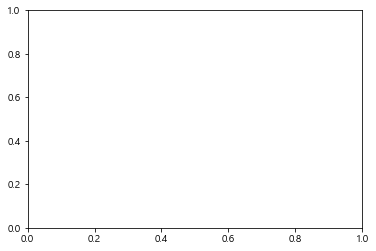

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.bar(year_expense.index, year_expense.values, tick_label =year_expense.index, width = 0.5)
plt.title("연도별 업무추진비 집행 횟수")
plt.xlabel("연도")
plt.ylabel("집행 횟수")
plt.show()

**[16장: 579페이지]**

In [103]:
import pandas as pd

year_total = pd.pivot_table(df_expense_all, index = ['집행연도'], values=['집행금액'], aggfunc = sum)
year_total

,집행금액
집행연도,
2017,9.076941e+09
2018,9.937557e+09
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""055ed9dfea3487d3412cbd46146a28a6f75b3b99021d10318b2cb2623e32b44c""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""0b234bc267bda5dcad5922e3679f188d644425823d4ad419aba10f28ccc2b011""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""11345b078267c7250a36c9d9576f640d6e7fc5c52b9fae712434a67dce86c14b""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""1b563e9940a116700946b6380bdcaab36b3415a4bea977a23b958cba74c25da3""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""1b91f0004ed192f587c0880540e027848e5f4208b7bdf3e2ebcdf79ab5d653cf""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""2af46ac015e9584e0226390883eefb6758cb7ed598f14be51cacd818f8805a8e""",0.000000e+00
"&quot;user_id&quot;:null}}"" data-hydro-click-hmac=""314516d37b394ade8b3223510cc7bc546381cf5e8cd28c353f37f9d26d91f933""",0.000000e+00


**[16장: 580페이지]**

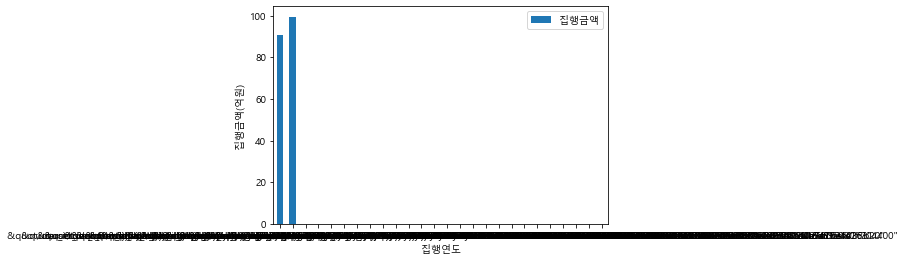

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

eok_won = 100000000 # 억원
(year_total/eok_won).plot.bar(rot=0) # 'rot = 각도'로 xtick 회전 각도를 지정
plt.ylabel('집행금액(억원)')
plt.show()

#### 월별 집행금액 분석

**[16장: 581페이지]** 

In [105]:
month_total = pd.pivot_table(df_expense_all, index = ['집행월'], values=['집행금액'], 
                             aggfunc = sum)
month_total

,집행금액
집행월,
1.0,1.445956e+09
2.0,1.482040e+09
3.0,1.498309e+09
4.0,1.339047e+09
5.0,1.316627e+09
6.0,1.448909e+09
7.0,1.490531e+09
8.0,1.391465e+09
9.0,1.575576e+09


**[16장: 581페이지]** 

In [106]:
year_month_total = pd.pivot_table(df_expense_all, index = ['집행월'], columns=['집행연도'], 
                                  values=['집행금액'], aggfunc = sum)
year_month_total

집행금액              
집행연도          2017          2018
집행월                             
1.0   7.103689e+08  7.355876e+08
2.0   7.126799e+08  7.693600e+08
3.0   7.372505e+08  7.610590e+08
4.0   6.352658e+08  7.037814e+08
5.0   6.475824e+08  6.690447e+08
6.0   7.582573e+08  6.906522e+08
7.0   7.016046e+08  7.889265e+08
8.0   6.611748e+08  7.302905e+08
9.0   8.061707e+08  7.694050e+08
10.0  6.372199e+08  8.270230e+08
11.0  8.436192e+08  9.603102e+08
12.0  1.225747e+09  1.532117e+09

**[16장: 582페이지]** 

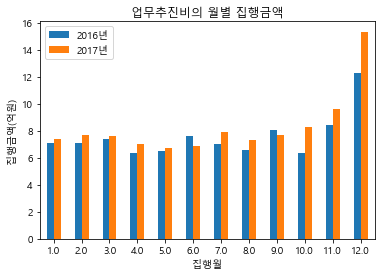

In [107]:
eok_won = 100000000 # 억원

(year_month_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비의 월별 집행금액")
plt.legend(['2016년', '2017년', '2018년'])
plt.show()

#### 부서별 집행 내역 분석

**[16장: 583페이지]** 

In [108]:
dept_level1_total = pd.pivot_table(df_expense_all, index = ['부서레벨1'], values=['집행금액'], 
                                   aggfunc = sum)
dept_level1_total

,집행금액
부서레벨1,
&quot;auth_type&quot;:&quot;SIGN_UP&quot;,0.000000e+00
"1""></path>",0.000000e+00
MARKETPLACE_TRENDING_SOCIAL_PROOF,0.000000e+00
사업소,4.212197e+09
서울시본청,1.068552e+10
소방재난본부(소방서),3.366190e+09
의회사무처,7.505948e+08


**[16장: 584페이지]** 

In [109]:
dept_level_2_total = pd.pivot_table(df_expense_all, index = ['부서레벨2'], values=['집행금액'], 
                                    aggfunc = sum)
dept_level_2_total.head()

,집행금액
부서레벨2,
&quot;client_id&quot;:null,0.0
119특수구조단,81014320.0
MARKETPLACE_RECOMMENDATIONS,0.0
감사위원회,221203150.0
강남소방서,150675520.0


**[16장: 584페이지]** 

In [110]:
dept_level_2_total_top10 = dept_level_2_total.sort_values(by=['집행금액'], ascending = False)[0:10]
dept_level_2_total_top10

,집행금액
부서레벨2,
상수도사업본부,1.427306e+09
기획조정실,9.404277e+08
행정국,9.346329e+08
서울특별시장,6.295230e+08
시민소통기획관,5.886783e+08
안전총괄본부,4.781643e+08
도시재생본부,4.263074e+08
도시기반시설본부,4.188852e+08
도시교통본부,4.080913e+08


**[16장: 585페이지]** 

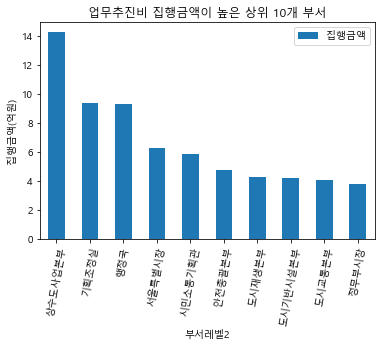

In [111]:
eok_won = 100000000 # 억원

(dept_level_2_total_top10/eok_won).plot.bar(rot=80)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비 집행금액이 높은 상위 10개 부서")
plt.show()

**[16장: 585 ~ 586페이지]** 

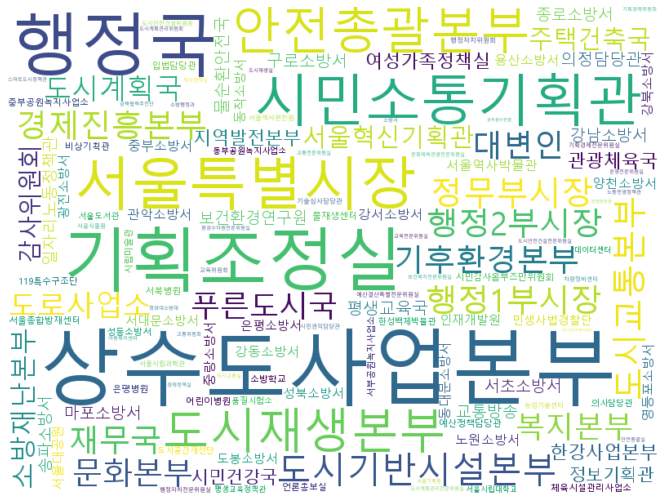

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white',
              width=800, height=600)

frequencies = dept_level_2_total['집행금액'] # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(12,9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

#### 요일별 및 시간대별 집행 내역 분석

**[16장: 586페이지]** 

In [113]:
df_expense_all['집행일시'].values

array([nan, nan, nan, ..., '2018-12-04 12:55', '2018-12-01 13:30',
       '2018-12-01 08:45'], dtype=object)

**[16장: 587페이지]** 

In [114]:
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])
expense_date_time.values

array([                          'NaT',                           'NaT',
                                 'NaT', ...,
       '2018-12-04T12:55:00.000000000', '2018-12-01T13:30:00.000000000',
       '2018-12-01T08:45:00.000000000'], dtype='datetime64[ns]')

**[16장: 587페이지]**  

In [115]:
week_day_name = ["월", "화", "수", "목", "금", "토", "일"]

df_expense_all['집행일시_요일'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

TypeError: list indices must be integers or slices, not float

**[16장: 587페이지]**  

In [116]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

**[16장: 587페이지]**  

In [117]:
df_expense_all.head(3)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_시간
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[16장: 588페이지]**  

In [118]:
expense_weekday = df_expense_all['집행일시_요일'].value_counts()
expense_weekday

KeyError: '집행일시_요일'

**[16장: 588페이지]**  

In [119]:
expense_weekday = expense_weekday.reindex(index = week_day_name)
expense_weekday

NameError: name 'expense_weekday' is not defined

**[16장: 589페이지]**  

In [120]:
expense_weekday.plot.bar(rot=0)
plt.title("요일별 업무추진비 집행 횟수")
plt.xlabel("요일")
plt.ylabel("집행 횟수")
plt.show()

NameError: name 'expense_weekday' is not defined

**[16장: 589페이지]**  

In [121]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()
expense_hour_num

12.0    56675
20.0    15335
13.0    13836
19.0    11207
21.0     8026
11.0     5626
14.0     5464
15.0     4833
18.0     3852
10.0     3779
0.0      3473
16.0     3324
9.0      2216
17.0     1970
22.0     1684
8.0       575
7.0       275
23.0       86
6.0        34
1.0        20
4.0        19
3.0        17
5.0        13
2.0        11
Name: 집행일시_시간, dtype: int64

**[16장: 590페이지]**  

In [122]:
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index = work_hour)
expense_hour_num

8       575
9      2216
10     3779
11     5626
12    56675
13    13836
14     5464
15     4833
16     3324
17     1970
18     3852
19    11207
20    15335
21     8026
22     1684
23       86
0      3473
1        20
2        11
3        17
4        19
5        13
6        34
7       275
Name: 집행일시_시간, dtype: int64

**[16장: 591페이지]** 

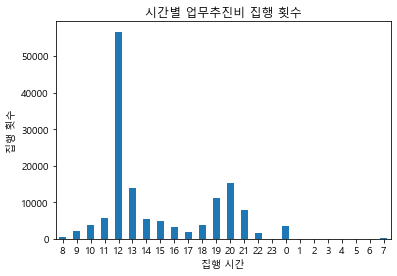

In [123]:
expense_hour_num.plot.bar(rot = 0)
plt.title("시간별 업무추진비 집행 횟수")
plt.xlabel("집행 시간")
plt.ylabel("집행 횟수")
plt.show()

**[16장: 592페이지]** 

In [124]:
expense_hour_total = pd.pivot_table(df_expense_all, index = ['집행일시_시간'],
                                    values=['집행금액'], aggfunc = sum)
expense_hour_total.head()

,집행금액
집행일시_시간,
0.0,593216317.0
1.0,2681220.0
2.0,1343029.0
3.0,5693869.0
4.0,4063237.0


**[16장: 592페이지]** 

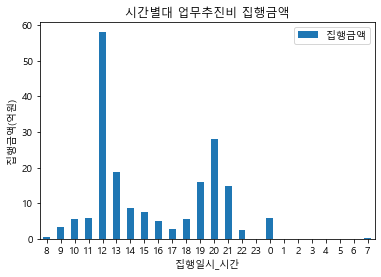

In [125]:
eok_won = 100000000 # 억원
expense_hour_total = expense_hour_total.reindex(index = work_hour)

(expense_hour_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("시간별대 업무추진비 집행금액")
plt.show()

## 16.4 정리